Jackson Boyle

 - Andry
 - Salmin
 - Linh

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import make_regression


import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [83]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


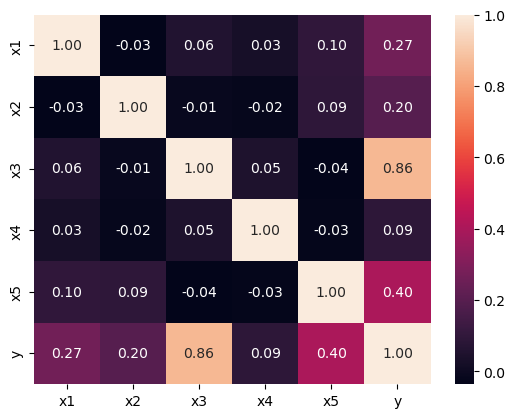

In [86]:
# Your code here. Add cells as needed.

corr = reg_df.corr()

sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression


candidate_idx1 = [0,1,2,4]
Z = X[:, candidate_idx1]
Z_names = [column_names[idx] for idx in candidate_idx1]

Z_names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_test = model_LR.score(Z_test, y_test)
R2_train = model_LR.score(Z_train, y_train)

print(f'R2_train {R2_train:.2f}')
print(f'R2_test {R2_test:.2f}')

y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE_train: {mse_train:.2f}')
print(f'MSE_test: {mse_test:.2f}')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')



R2_train 0.72
R2_test 0.66
MSE_train: 20.59
MSE_test: 24.49
Fit Model:
 y = -15.26 + 65.21*x1 + 76.89*x2 + 94.64*x3 + 69.71*x5


#### Your written answers here

What are your model parameters?
 -  y = -15.26 + 65.21*x1 + 76.89*x2 + 94.64*x3 + 69.71*x5

What were your MSE and R^2?
 - R2 = .66 and MSE = 24.49



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [84]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


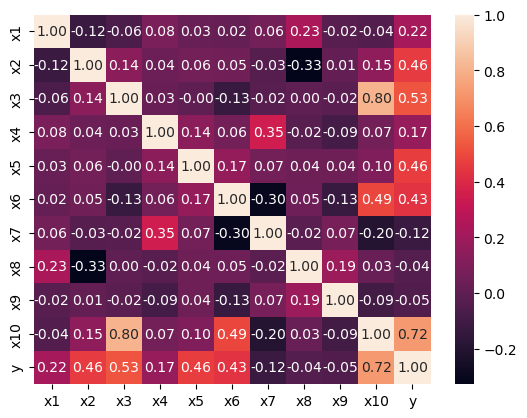

In [76]:
corr = reg2_df.corr()

sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# candidate_idx = [0,1,2,3,4,5,9]
candidate_idx = [0,1,3,4,9]
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_test = model_LR.score(Z_test, y_test)
R2_train = model_LR.score(Z_train, y_train)

print(f'R2_train {R2_train:.2f}')
print(f'R2_test {R2_test:.2f}')

R2_train 0.86
R2_test 0.89


In [85]:
from sklearn.metrics import mean_squared_error

model_LR.__dict__
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')
y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE_train: {mse_train:.2f}')
print(f'MSE_test: {mse_test:.2f}')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.43 + 59.40*x1 + 71.25*x2 + 10.27*x4 + 57.19*x5 + 177.41*x10
MSE_train: 9.24
MSE_test: 10.80


#### Your written answers here

What are your model parameters?
 -  y = -15.43 + 59.40*x1 + 71.25*x2 + 10.27*x4 + 57.19*x5 + 177.41*x10


Which features (x1, x2...) were significant? Which were co-linear?
 - x1, x2, x4, x5, x10. x3 and x6 were too similar to x10
 
What were your MSE and R^2?
 - MSE of 7.7 and R2 of .89



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [5]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


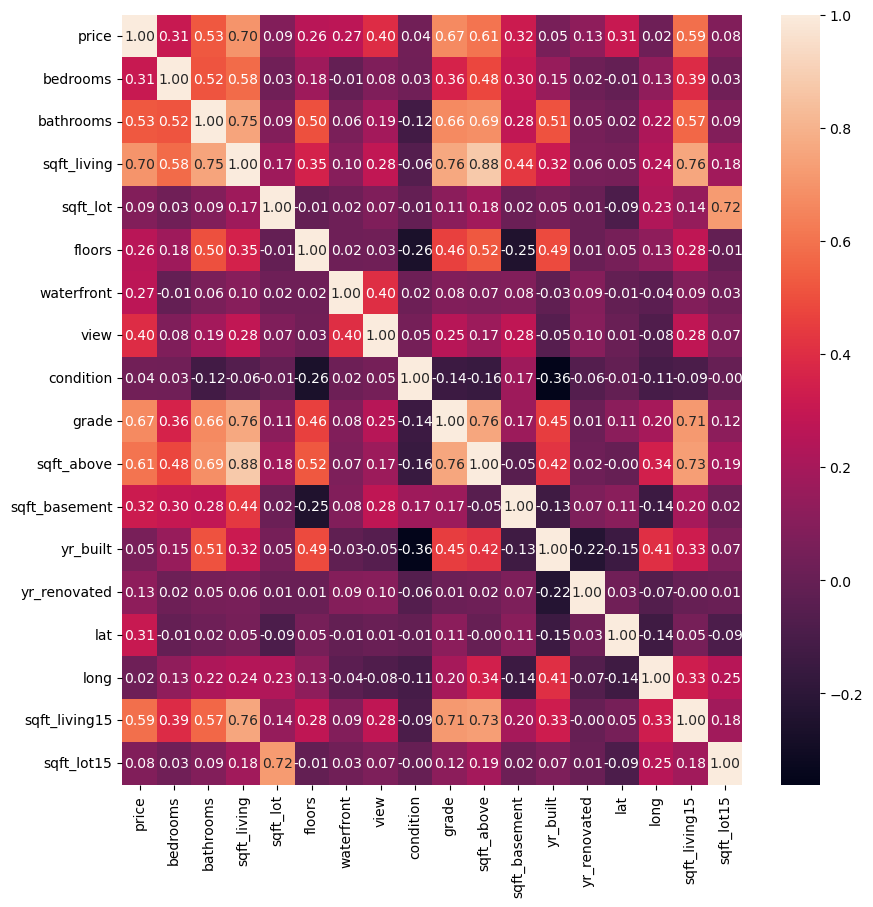

In [68]:
# Your code here. Add cells as needed.

    # 'sqft_living', 'grade', 'bathrooms'
# Your code here. Add cells as needed.

housing_df = housing_df.drop(columns=['date', 'id', 'zipcode'])
housing_df.head()

corr = housing_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

R2_train 0.54
R2_test 0.51


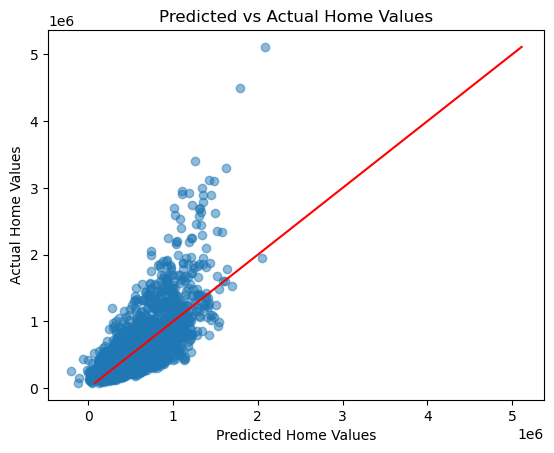

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaled_features = scaler.fit_transform(housing_df[['sqft_living', 'grade', 'bathrooms']])
X = housing_df[['sqft_living', 'grade', 'bathrooms']]
y = housing_df[['price']].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)



model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

R2_test = model_LR.score(X_test, y_test)
R2_train = model_LR.score(X_train, y_train)

print(f'R2_train {R2_train:.2f}')
print(f'R2_test {R2_test:.2f}')
plt.scatter(model_LR.predict(X_test), y_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Predicted Home Values')
plt.ylabel('Actual Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - sqft_living, bathrooms, and grade because they had the three highest coorelations without being highly coorelated to each other (sqft_above was higher than bathrooms but that ws too similar to sqft_living)

## Creating Training and Testing Data
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, `feature_names = x.columns`.# b. 
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [45]:
# Your code here. Add cells as needed.

from sklearn.linear_model import Lasso, Ridge
import pandas as pd
scaler = StandardScaler()
y = housing_df['price']
X = housing_df.drop(columns=['price', 'date', 'zipcode'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

model_lasso = Lasso(alpha=30000)
model_lasso.fit(X_scaled_train, y_train)

R2_test = model_lasso.score(X_scaled_test, y_test)
R2_train = model_lasso.score(X_scaled_train, y_train)

feature_names = X.columns

print(feature_names)
print(R2_test)
print(R2_train)
coef = model_lasso.coef_
print(f'Lasso Coefficients: {coef}')
print(f'Lasso Coefficients: {np.argsort(coef)}')
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

coef_table['Absolute Coefficient'] = coef_table['Coefficient'].abs()
coef_table = coef_table.sort_values(by='Absolute Coefficient', ascending=False)

print(coef_table[['Feature', 'Coefficient']])

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
0.6409334720129227
0.6533035317299607
Lasso Coefficients: [    -0.             -0.              0.         139237.02241937
      0.              0.          31254.42774561  32962.69754105
      0.         100289.99185283      0.              0.
 -29040.39073946      0.          59955.98588797     -0.
   1023.82928348     -0.        ]
Lasso Coefficients: [12  0 15 13 11 10  8  5  4  2  1 17 16  6  7 14  9  3]
          Feature    Coefficient
3     sqft_living  139237.022419
9           grade  100289.991853
14            lat   59955.985888
7            view   32962.697541
6      waterfront   31254.427746
12       yr_built  -29040.390739
16  sqft_living15    1023.829283
11  sqft_basement       0.000000
15           long      

R2_train 0.59
R2_test 0.61


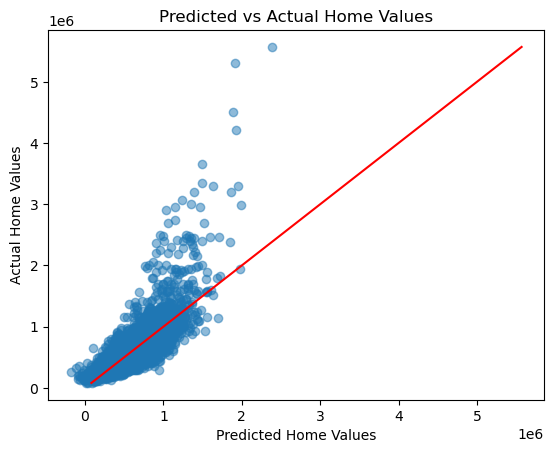

In [46]:
X = housing_df[['sqft_living', 'grade', 'lat']]
y = housing_df[['price']].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

model_L = Lasso()
model_L.fit(X_train, y_train)

R2_test = model_L.score(X_test, y_test)
R2_train = model_L.score(X_train, y_train)

print(f'R2_train {R2_train:.2f}')
print(f'R2_test {R2_test:.2f}')
plt.scatter(model_L.predict(X_test), y_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Predicted Home Values')
plt.ylabel('Actual Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

### Your written answers here
Which regression did you use?
 - Lasso

Does your regularized model look better than your MLR? How so?
 - Yes, the R2 values were .05 and .1 better meaning the model was a better representation/predictor of the price

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

 below R2_train 0.61
below R2_test 0.61
above R2_train 0.35
above R2_test 0.24


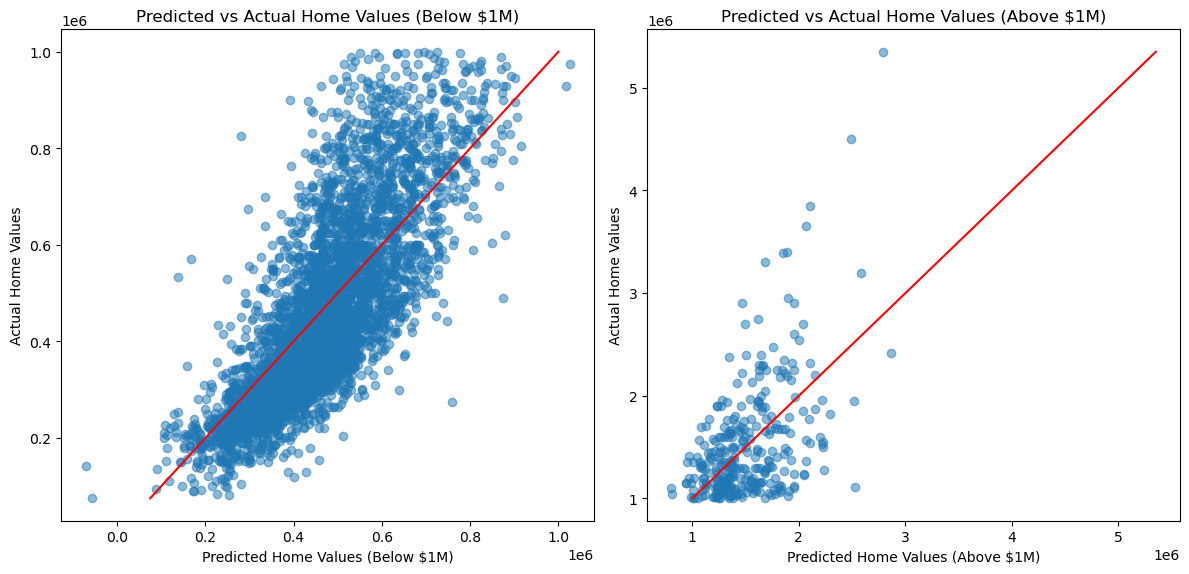

In [ ]:
# Your code here. Add cells as needed.
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

X_below_1M = below_1M[['sqft_living', 'grade', 'lat']]
y_below_1M = below_1M['price']

X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below_1M, y_below_1M, test_size=0.2)

X_scaled_train_below = scaler.fit_transform(X_train_below)
X_scaled_test_below = scaler.transform(X_test_below)

X_above_1M = above_1M[['sqft_living', 'grade', 'lat']]
y_above_1M = above_1M['price']

X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above_1M, y_above_1M, test_size=0.2)

X_scaled_train_above = scaler.fit_transform(X_train_above)
X_scaled_test_above = scaler.transform(X_test_above)

model_lasso_below = Lasso(alpha=10000)
model_lasso_below.fit(X_scaled_train_below, y_train_below)

bR2_test = model_lasso_below.score(X_scaled_test_below, y_test_below)
bR2_train = model_lasso_below.score(X_scaled_train_below, y_train_below)

print(f' below R2_train {bR2_train:.2f}')
print(f'below R2_test {bR2_test:.2f}')

model_lasso_above = Lasso(alpha=1000)
model_lasso_above.fit(X_scaled_train_above, y_train_above)

aR2_test = model_lasso_above.score(X_scaled_test_above, y_test_above)
aR2_train = model_lasso_above.score(X_scaled_train_above, y_train_above)

print(f'above R2_train {aR2_train:.2f}')
print(f'above R2_test {aR2_test:.2f}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model_lasso_below.predict(X_scaled_test_below), y_test_below, alpha=0.5)
plt.plot([min(y_test_below), max(y_test_below)], [min(y_test_below), max(y_test_below)], color='red')
plt.xlabel('Predicted Home Values (Below $1M)')
plt.ylabel('Actual Home Values')
plt.title('Predicted vs Actual Home Values (Below $1M)')

plt.subplot(1, 2, 2)
plt.scatter(model_lasso_above.predict(X_scaled_test_above), y_test_above, alpha=0.5)
plt.plot([min(y_test_above), max(y_test_above)], [min(y_test_above), max(y_test_above)], color='red')
plt.xlabel('Predicted Home Values (Above $1M)')
plt.ylabel('Actual Home Values')
plt.title('Predicted vs Actual Home Values (Above $1M)')

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - for the below 1 million $ homes - .60 for the training and .62 for the testing
  - for the above 1 million $ homes - .33 for both training and testing
 
